# Факторы успешности компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Предобработка данных

In [1]:
#импортирую необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#сохраняю данные в переменной df
df = pd.read_csv('/datasets/games.csv')

Ознакомимся с датафреймом на примере пяти верхних строк, посмотрим общую информацию о датафрейме и долю пропусков.

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

В целях соблюдения стандартов приведем названия столбцов к нижнему регистру.

In [6]:
#привожу назнвания столбцов к нижнему регистру при помощи генератора
df.columns = [name.lower() for name in df.columns]

In [7]:
print('Теперь названия столбцов выглядят так:', *df.columns, sep='\n')

Теперь названия столбцов выглядят так:
name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating


In [8]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В столбце с рейтингом пользователей имеется нечисловое значение "tbd", что является общепринятым сокращением фразы "to be determined", т.е. "подлежит определению". 

Данное значение указывает на то, что рейтинг игры еще не определен, но будет определен в будущем. 

Однако поскольку на данный момент рейтинг не определен, заменим данное значение на nan, после чего можно изменим тип данных в столбца на float.

In [9]:
df.loc[df['user_score']=='tbd', 'user_score'] = np.nan

In [10]:
df['user_score'] = df['user_score'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Пропуски в столбцах о рейтинге заполнять нецелесообразно, поскольку корректно определить рейтинг игры не представляется возможным, т.к. этот показатель идивидуален для каждой игры. Заполнение пропусков средними значениями привело бы к искажению результатов анализа.

Теоретически можно было бы найти в интернете данные о годе выпуска игр и заполнить пропуски в столбце с годами выпуска игр, однако доля пропусков в стобце незначительна, а ручной поиск данных и заполнение значений повлекут неопрадванные временные затраты. Поэтому в этом столбце также пропуски трогать не будем.

In [12]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строки двух игр без названия и жанра удалим - для анализа они непригодны.

In [13]:
df = df.dropna(subset=["genre","name"])

Типы данных столбцов менять нет необходимости. Они соотствуют содержащимся значениям.

In [14]:
print('Дубликатов в данных:', df.duplicated().sum())

Дубликатов в данных: 0


Для последующего анализа добавим столбцец с суммой всех продаж игры.

In [15]:
df.insert(8, 'sum_sales', df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1))

In [16]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,sum_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


**Вывод**

Проведено первичное ознакомление с данными. Названия столбцов приведены к нижнему регистру. Значение "tbd" в столбце с рейтингом пользователей заменено на пропуск и тип данных столбца изменен на числовой (float). Данные проверены на дубликаты. Добавлен столбец с общей суммой продаж игры.

## Исследовательский анализ данных

### Общие тенденции

Посмотрим сколько игр выпускалось в разные периоды на гистограмме.

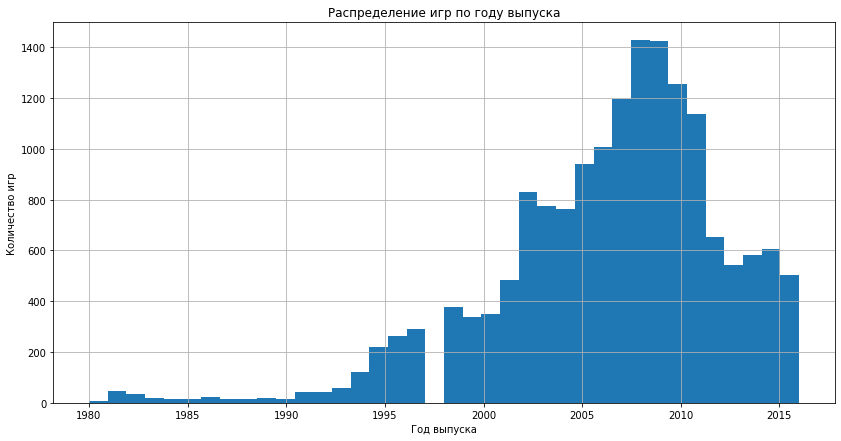

In [17]:
df['year_of_release'].hist(bins=len(df['year_of_release'].unique()), figsize=(14, 7))
plt.title('Распределение игр по году выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

С 1993 по 2008 г. происходил явно выраженный рост количества выпускаемых игр. Пик был достигнут в 2008-2009 гг. на уровне немного более 1400 игр в год, после чего в 2010-2011 гг. количество выпускаемых игр резко снизилось примерно до 600 игр в год. В 2016 году было выпущено около 500 игр. Таким образом, имеются основания для ожидания в будущем сохранения количества выпускаемых игр на уровне 500-600 в год либо плавного снижения. Для отслеживания актуальных тенденций на рынке компьютеных игр целесообразно использование данных, начиная с 2012 года, поскольку по количеству выпускаемых игр данный период наиболее похож на современный.

---

Посмотрим как распределялись продажи игр на разных платформах.

Сгруппируем платформы по общему количеству продаж и отсортируем по убыванию.

In [18]:
max_sales_platforms = df.groupby('platform')['sum_sales'].agg('sum').sort_values(ascending=False)

In [19]:
max_sales_platforms.head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sum_sales, dtype: float64

К самым успешным платформам можно отнести те, общие продажи игр для которых превысили 700 млн. экземпляров, т.к. данная границы отделяет платформы с заметно меньшими продажами (по следующей платформе продажи уже 317 млн.).

In [20]:
max_sales_platforms = max_sales_platforms[max_sales_platforms > 700].index

In [21]:
print('Список самых успешных платформ для компьютерных игр за всю историю:', 
      *max_sales_platforms, sep='\n')

Список самых успешных платформ для компьютерных игр за всю историю:
PS2
X360
PS3
Wii
DS
PS


Создадим сводную таблицу по годовым продажам на данных платформах и построим линейные графики.

In [22]:
max_platforms_sales_by_year = (df.query('platform in @max_sales_platforms')
                               .pivot_table(index='year_of_release', 
                                            columns='platform', 
                                            values='sum_sales', 
                                            aggfunc='sum'))

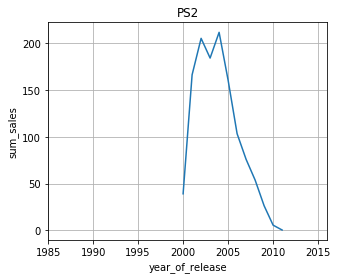

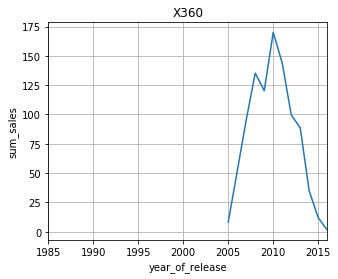

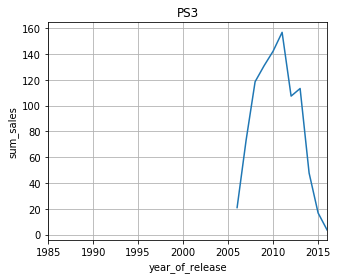

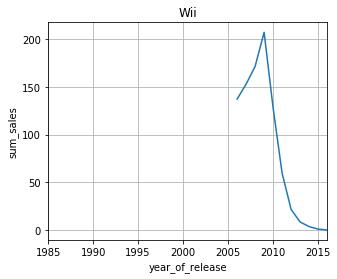

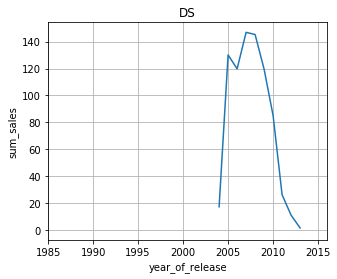

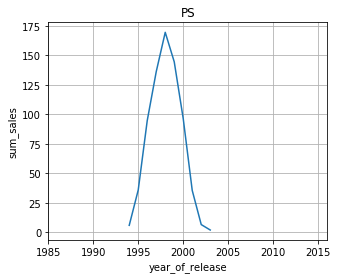

In [23]:
for platform in max_sales_platforms:
    max_platforms_sales_by_year[platform].plot(grid=True, figsize=(5, 4))
    plt.title(platform)
    plt.ylabel('sum_sales')
    plt.show()

В среднем у самых успешных платформ период жизни составляет 9-11 лет. В первой половине периода продажи растут, во второй - падают.

С учетом этого, а также наличия общей тенденции суммарных продаж с 2012 года, включим в данные для анализа период начиная с 2012 года. В данном периоде можно увидеть рост/падение платформы и отследить тенденции на рынке компьютерных игр, которые можно ожидать и в предстоящем году.

In [24]:
actual_data = df.query('year_of_release >= 2012')

Создадим сводную таблицу по годовым продажам платформ в актуальном периоде и визуализируем данные на линейных графиках.

In [25]:
actual_data_platform_by_year = actual_data.pivot_table(index='year_of_release', values='sum_sales', columns='platform', aggfunc='sum')

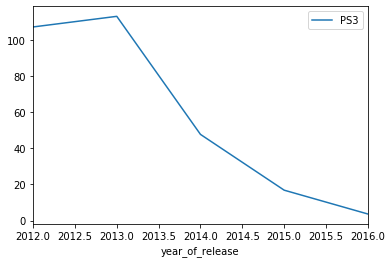

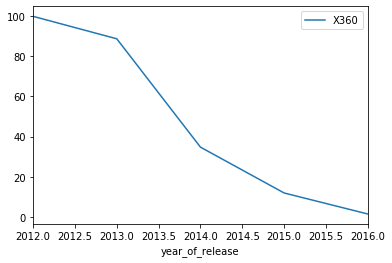

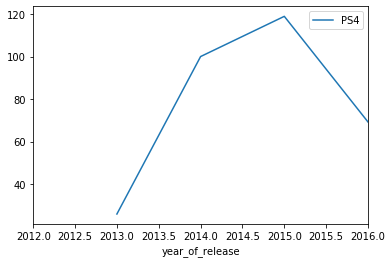

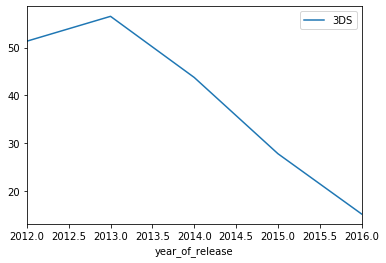

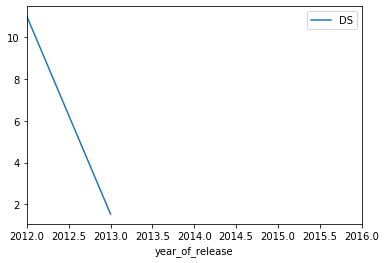

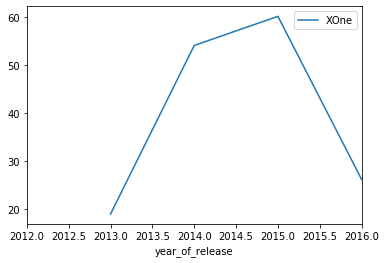

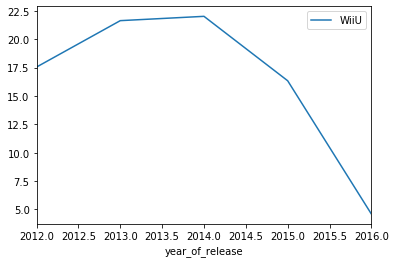

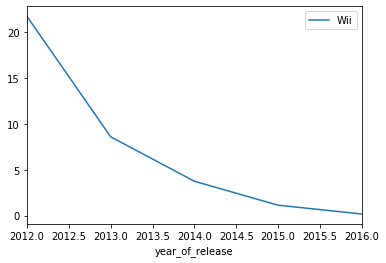

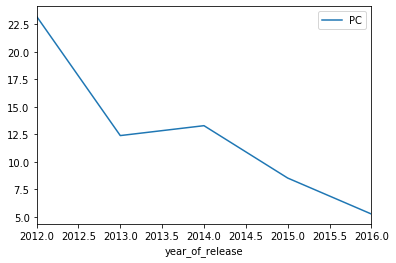

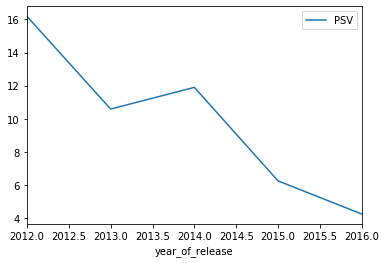

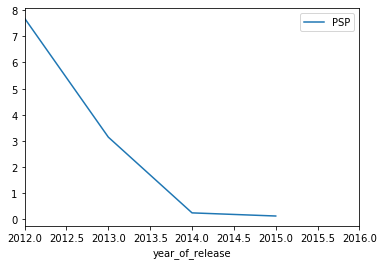

In [26]:
for platform in actual_data['platform'].unique():
    actual_data_platform_by_year[platform].plot(legend=True)
    plt.show()

Более менее оптимистичный прогноз можно сделать только по двум платформам: PS4 и XOne. На графиках продаж игр для других платформ видно, что период их жизни подходит к концу.

In [27]:
# КОД РЕВЬЮЕРА

actual_data.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').loc[[2015, 2016]]

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Я действительно сначала не задумывался над тем, по каждой игре указаны продажи не за год выпуска, а за весь период существования до выгрузки. Так, конечно, графики воспринимаются немного по-другому.

---

Посмотрим на размер средних продаж игр на перпспективных платформах по "ящику с усами".

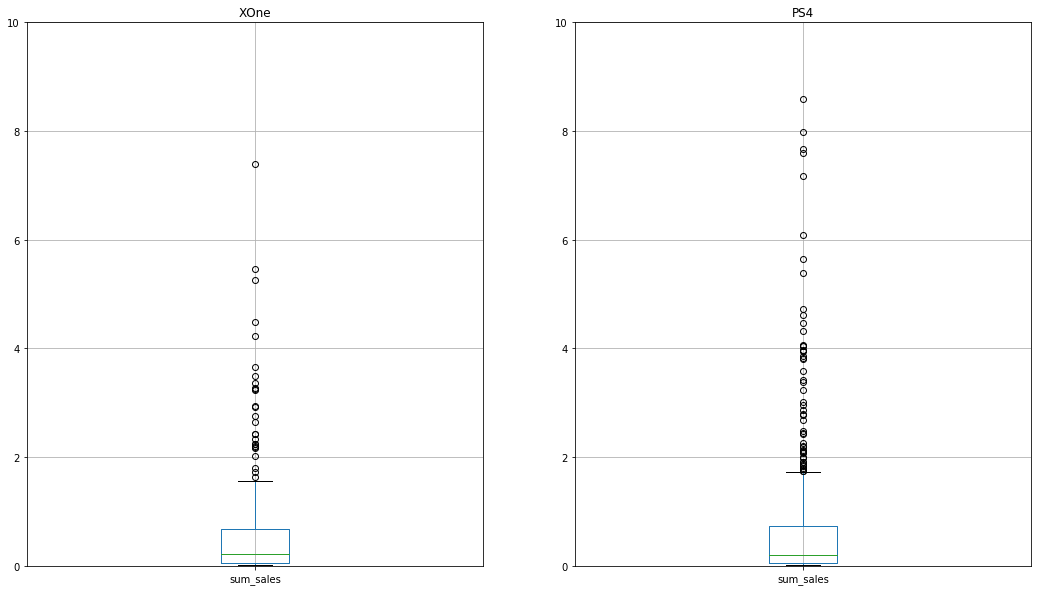

In [28]:
plt.figure(figsize=(18, 10)) 
plt.subplot(1, 2, 1)
actual_data.query('platform == "XOne"')['sum_sales'].plot(kind='box', grid=True, ylim=(0, 10))
plt.title("XOne")
plt.subplot(1, 2, 2)
actual_data.query('platform == "PS4"')['sum_sales'].plot(kind='box', grid=True, ylim=(0, 10))
plt.title("PS4")
plt.show()

Приблизим фрагмент с большинством значений, обрезав графики по продажам 4 млн.

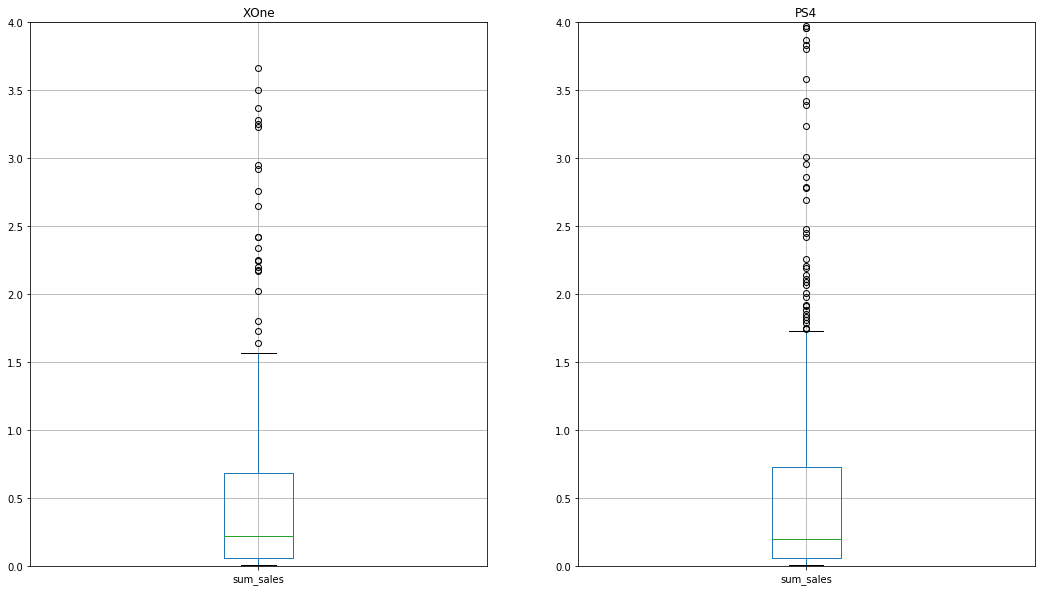

In [29]:
plt.figure(figsize=(18, 10)) 
plt.subplot(1, 2, 1)
actual_data.query('platform == "XOne"')['sum_sales'].plot(kind='box', grid=True, ylim=(0, 4))
plt.title("XOne")
plt.subplot(1, 2, 2)
actual_data.query('platform == "PS4"')['sum_sales'].plot(kind='box', grid=True, ylim=(0, 4))
plt.title("PS4")
plt.show()

Строим боксплот в разбивке по платформам.

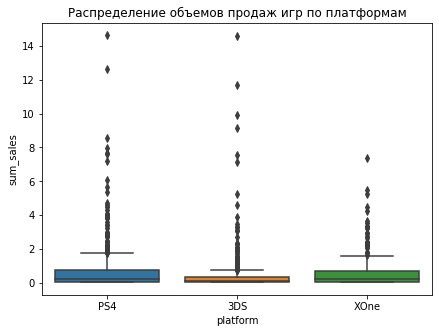

In [30]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=actual_data.query('platform in ["XOne", "PS4", "3DS"]'), x='platform', y='sum_sales')
plt.title('Распределение объемов продаж игр по платформам')
plt.show()

По графику видно, что у всех платформ значения продаж свыше 2 млн. относятся к выбросам, т.е. нестандартным значениям.

Обрежем график по оси y значением 2 млн. чтобы лучше рассмотреть распределение.

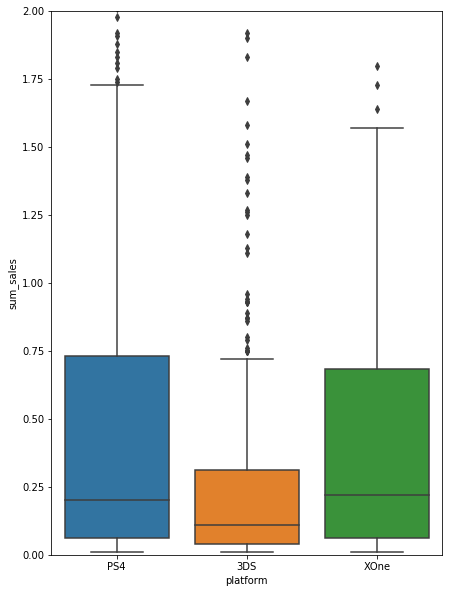

In [31]:
plt.figure(figsize=(7, 10))
sns.boxplot(data=actual_data.query('platform in ["XOne", "PS4", "3DS"]'), x='platform', y='sum_sales')
plt.ylim(0, 2)
plt.show()

Большинство значений продаж игр на PS4 находится до 1.75 млн., XOne - до 1.6 млн., 3DS - до 0,75 млн. Выше данных границ содержатся выбросы, то есть редкие, нестандартные значения. 

Медианные значения продаж на двух перспективных платформах практически одинаковые - около 0.2 млн. экземпляров. Однако игр с большим объемом продажам (свыше 1.5 млн.) заметно больше на PS4. Следовательно, среднее значение продаж игры на PS4 также должно быть существенно больше.

На 3DS медианое значение меньше примерно в 2 раза. Средний объем продаж игры видимо также меньше, чем у конкурентов.

In [32]:
print('Средние продажи игры на PS4:', 
      round(actual_data.query('platform == "PS4"')['sum_sales'].mean(), 2))
print('Средние продажи игры на XOne:', 
      round(actual_data.query('platform == "XOne"')['sum_sales'].mean(), 2))
print('Средние продажи игры на 3DS:', 
      round(actual_data.query('platform == "3DS"')['sum_sales'].mean(), 2))

Средние продажи игры на PS4: 0.8
Средние продажи игры на XOne: 0.65
Средние продажи игры на 3DS: 0.49


---

Посмотрим на зависимость продаж от критиков и пользователей.

Построим гистограмму по PS4.

In [33]:
data_PS4 = actual_data.query('platform == "PS4"')

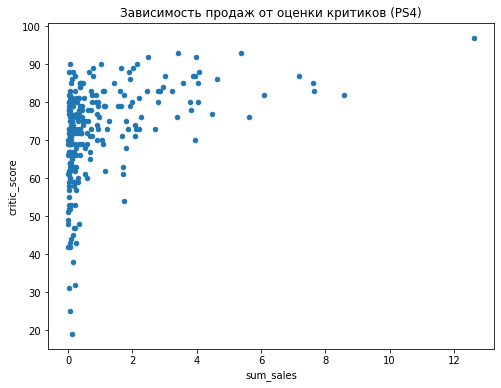

In [34]:
data_PS4.plot(x='sum_sales', y='critic_score', kind='scatter', figsize=(8, 6))
plt.title('Зависимость продаж от оценки критиков (PS4)')
plt.show()

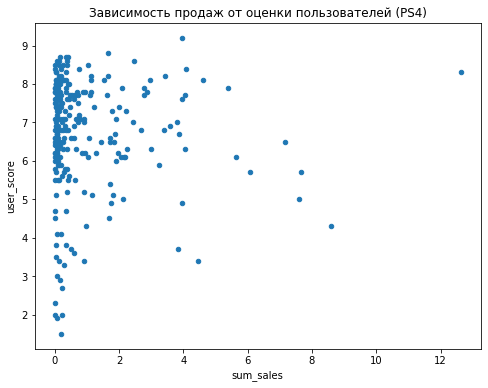

In [35]:
data_PS4.plot(x='sum_sales', y='user_score', kind='scatter', figsize=(8, 6))
plt.title('Зависимость продаж от оценки пользователей (PS4)')
plt.show()

Посчитаем корреляцию.

In [36]:
data_PS4[['sum_sales', 'critic_score', 'user_score']].corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Между оценками критиков и продажами имеется заметная положительная корреляция. По гистограмме видно, что "сорвать куш" есть шанс лишь у игр с высокой оценкой критиков.

Относительно оценки пользователей корреляция практически не заметна. На гистограмме имеются игры с большими продажами (более 4 млн.) со средними и даже низким рейтингом у пользователей (рейтинг даже до 5). Коэффициент корреляции почти нулевой.

Сопоставим выводы с данными по всем платформам.

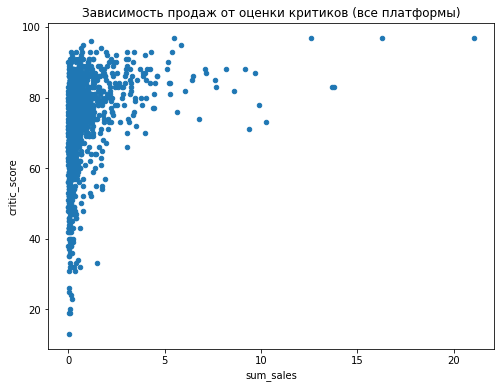

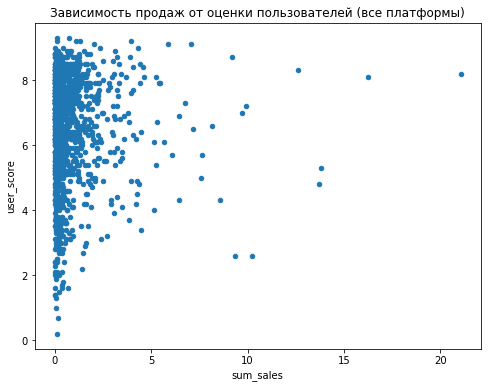

In [37]:
actual_data.plot(x='sum_sales', y='critic_score', kind='scatter', figsize=(8, 6))
plt.title('Зависимость продаж от оценки критиков (все платформы)')
plt.show()

actual_data.plot(x='sum_sales', y='user_score', kind='scatter', figsize=(8, 6))
plt.title('Зависимость продаж от оценки пользователей (все платформы)')
plt.show()

In [38]:
actual_data[['sum_sales', 'critic_score', 'user_score']].corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.308197,0.004429
critic_score,0.308197,1.000000,0.517727
user_score,0.004429,0.517727,1.000000


Выводы сделанные по PS4 также выражены и по всем платформам. Рейтинг критиков на PS4 более показателен, чем на данных по всем платформам.

---

Проанализируем с точки зрения объема продаж данные в разрезе по игровым жанрам.

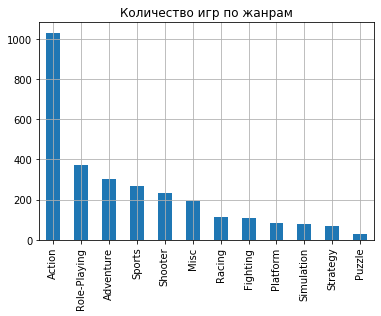

In [39]:
actual_data['genre'].value_counts().plot(kind='bar', grid=True)
plt.title('Количество игр по жанрам')
plt.show()

Экшенов заметно больше.

In [40]:
data_genres = actual_data.pivot_table(index='genre', values='sum_sales', aggfunc=['count', 'mean', 'median'])

In [41]:
data_genres.columns=['Количество', 'Среднее значение продаж', 'Медиана продаж']

In [42]:
data_genres = data_genres.sort_values(by='Среднее значение продаж', ascending=False)

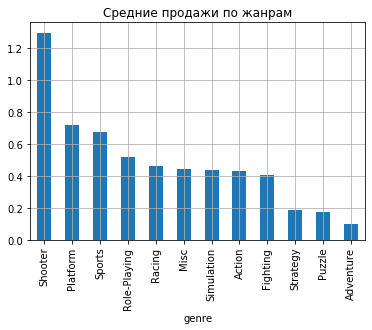

In [43]:
data_genres['Среднее значение продаж'].plot(kind='bar', grid=True)
plt.title('Средние продажи по жанрам')
plt.show()

А вот по прибыльности лидируют шутеры, продажи у них заметно больше. К высоким продажам можно отнести также игры в жанрах "Platform" и "Sports". Низкие продажи у стратегий, головоломок и приключений.

### Специфика регионов

Составим портрет пользователя для каждого региона.

Найдем топ-5 платформ в Европе.

In [44]:
eu_top_platforms = (
    actual_data
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
) #создаю сводную таблицу платформы к продажам в Европе, сортирую по убыванию

eu_top_platforms['share'] = (round(eu_top_platforms['eu_sales'] 
                                   / eu_top_platforms['eu_sales'].sum() , 2)) 
#долю от всех продаж ввожу отдельным столбцом

eu_top_platforms = eu_top_platforms[:5] #обрезаю пятью верхними значениями

eu_top_platforms = eu_top_platforms.reset_index() 
eu_top_platforms.columns = [['europe'] * 3, ['platform', 'sales', 'share']]
#создаю новые индексы и ввожу двухуровневые названия столбцов 
#для последующего слияния в общую таблицу (по всем регионам)

In [45]:
print('Рейтинг платформ по продажам в Европе')
eu_top_platforms

Рейтинг платформ по продажам в Европе


europe              
  platform   sales share
0      PS4  141.09  0.28
1      PS3  106.86  0.21
2     X360   74.52  0.15
3     XOne   51.59  0.10
4      3DS   42.64  0.08

Далее найдем топ-5 в других регионах и объединим данные в единую таблицу.

In [46]:
#создаю аналогичные таблицы по Северной Америки и Японии, а затем объединяю все три таблицы в одну

#создаю таблицу по Северной Америке
na_top_platforms = (
    actual_data
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
na_top_platforms['share'] = round(na_top_platforms['na_sales'] / na_top_platforms['na_sales'].sum() , 2)
na_top_platforms = na_top_platforms[:5]
na_top_platforms = na_top_platforms.reset_index()
na_top_platforms.columns = [['north_america'] * 3, ['platform', 'sales', 'share']]

#создаю таблицу по Японии
jp_top_platforms = (
    actual_data
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
jp_top_platforms['share'] = round(jp_top_platforms['jp_sales'] / jp_top_platforms['jp_sales'].sum() , 2)
jp_top_platforms = jp_top_platforms[:5]
jp_top_platforms = jp_top_platforms.reset_index()
jp_top_platforms.columns = [['japan'] * 3, ['platform', 'sales', 'share']]

#объединяю таблицы по всем регионам
top_platforms_by_region = (eu_top_platforms
                 .merge(na_top_platforms, left_index=True, right_index=True)
                 .merge(jp_top_platforms, left_index=True, right_index=True)
                )

#прибавляю 1 к номеру индекса, чтобы индекс отражал место в рейтинге
top_platforms_by_region.index += 1 

In [47]:
top_platforms_by_region

europe               north_america                  japan             
  platform   sales share      platform   sales share platform  sales share
1      PS4  141.09  0.28          X360  140.05  0.24      3DS  87.79  0.46
2      PS3  106.86  0.21           PS4  108.74  0.18      PS3  35.29  0.18
3     X360   74.52  0.15           PS3  103.38  0.17      PSV  21.04  0.11
4     XOne   51.59  0.10          XOne   93.12  0.16      PS4  15.96  0.08
5      3DS   42.64  0.08           3DS   55.31  0.09     WiiU  13.01  0.07

В Европе и Северной Америке в топ-5 входят одни и те же платформы с некоторым различием в занимаемых в рейтинге местах. В Европе лидирует PS4, в Северной Америке - X360. Доли их продаж очень схожи (0.28 и 0.24 соответственно). В тройку лидеров в обоих регионах входит PS3. На третьем и четвертом месте одни и те же платформы - XOne и 3DS.

Топ-5 Японии совершенно иной. Xbox совсем не представлен в рейтинге. Доля продаж PS3 и PS4 заметно ниже чем в других регионах. Однако  продажи по PSV занимают 3 место (11% от общего количества продаж) - между PS3 и PS4. С огромным отрывом в Японии лидирует 3DS, продажи по которой близятся к половине рынка - 0.46.

---

Рассмотрим продажи по регионам в разрезе жанров.

In [48]:
#создаю сводную таблицу топ-5 жанров для Европы
eu_top_genres = (
    actual_data
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

#создаю столбец с долей продаж
eu_top_genres['share'] = round(eu_top_genres['eu_sales'] / eu_top_genres['eu_sales'].sum() , 2)

#обрезаю по верхним пяти жанрам
eu_top_genres = eu_top_genres[:5]

#для последующего слияния создаю индексы и двухуровневые названия столбцов
eu_top_genres = eu_top_genres.reset_index()
eu_top_genres.columns = [['europe'] * 3, ['genre', 'sales', 'share']]

In [49]:
#создаю аналогичные таблицы для Северной Америки и Японии, после чего объединяю все три в одну

#создаю таблицу с топ-5 жанров в Северно Америке
na_top_genres = (
    actual_data
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
na_top_genres['share'] = round(na_top_genres['na_sales'] / na_top_genres['na_sales'].sum() , 2)
na_top_genres = na_top_genres[:5]
na_top_genres = na_top_genres.reset_index()
na_top_genres.columns = [['north_america'] * 3, ['genre', 'sales', 'share']]

#создаю таблицу с топ-5 жанров в Японии
jp_top_genres = (
    actual_data
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
jp_top_genres['share'] = round(jp_top_genres['jp_sales'] / jp_top_genres['jp_sales'].sum() , 2)
jp_top_genres = jp_top_genres[:5]
jp_top_genres = jp_top_genres.reset_index()
jp_top_genres.columns = [['japan'] * 3, ['genre', 'sales', 'share']]

#объединяю все три таблицы
top_genres_by_region = (eu_top_genres
                        .merge(na_top_genres, left_index=True, right_index=True)
                        .merge(jp_top_genres, left_index=True, right_index=True)
                       )

#прибавляю 1 к номеру индекса, чтобы индекс соответствовал месту в рейтинге
top_genres_by_region.index += 1

In [50]:
top_genres_by_region

europe               north_america                       japan  \
          genre   sales share         genre   sales share         genre   
1        Action  159.34  0.31        Action  177.84  0.30  Role-Playing   
2       Shooter  113.47  0.22       Shooter  144.77  0.24        Action   
3        Sports   69.09  0.14        Sports   81.53  0.14          Misc   
4  Role-Playing   48.53  0.10  Role-Playing   64.00  0.11    Simulation   
5        Racing   27.29  0.05          Misc   38.19  0.06      Fighting   

                
   sales share  
1  65.44  0.34  
2  52.80  0.27  
3  12.86  0.07  
4  10.41  0.05  
5   9.44  0.05

Любимые жанры европейцев и американцев вновь совпадают. В топ-5 отличия только в пятой строчке: у европейцев - гонки, у американцев - аркады. В остальном предпочтения совпадают: 
1 место - экшены (30% и 31% продаж),
2 место - шутеры (22% и 24%),
3 место - спортивные (14%),
4 место - RPG (10%, 11%).

У японцов с большим отрывом лидируют RPG и экшены, занимая в сумме больше половины рынка. Остальные жанры представлены в топ-5 совсем скромно: 7% продаж у аркад и по 5% - у симуляторов и драк.

---

Посмотрим на связь рейтинга ESRB с продажами по регионам.

Для анализа возможного влияния отсутствия рейтинга на продажи, заменим отсутствующие значения на 'Нет рейтинга'.

In [61]:
actual_data['rating'].fillna('Нет рейтинга', inplace=True)

Создадим сводную таблицу рейтингов к процентам продаж по регионам и посмотрим на нее на хитмэп.

In [52]:
#создаю сводную таблицу со значениями продаж по регионам
rating_to_sales_by_region = actual_data.pivot_table(
    index='rating', 
    values=['eu_sales', 'na_sales', 'jp_sales'], 
    aggfunc='sum'
)

In [53]:
#меняю значения продаж на процент продаж
for row in rating_to_sales_by_region:
    rating_to_sales_by_region[row] = round(rating_to_sales_by_region[row] / rating_to_sales_by_region[row].sum(), 2) * 100

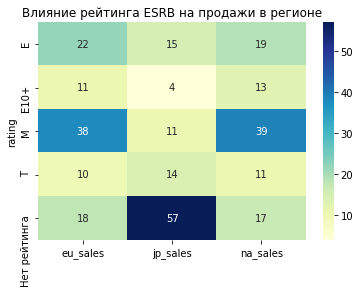

In [54]:
#строю хитмэп по данной таблице
sns.heatmap(rating_to_sales_by_region, annot=True, cmap="YlGnBu")
plt.title('Влияние рейтинга ESRB на продажи в регионе')
plt.show()

В Европе и Америке больше играют во взрослые игры (М), которые занимают 38% продаж. На втором месте "игры для всех" (Е) - 22% и 19% соответственно. Рейтинг ESRB отсутствует у 17-18%.

В Японии у большинства игр рейтинг ESRB отсутствует, игр без рейтинга - 57%. В играх с рейтингом предпочтения отдаются играм для детей (Е) и подростков (Т)  - продажи по ним составляют 15% и 14% соответственно.

---

### Проверка гипотез

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

С учетом того, что мы имеем возможность обработать всю совокупность значений рейтингов игр на данных платформах, проверять гипотезу целесообразно путем нахождения среднего пользовательских рейтингов на данных платформах и их сравнения, без использования специальных статистических методов.

In [55]:
pc_user_scores = actual_data.query('platform == "PC"')['user_score'].dropna() #создаю список значений рейтингов PC
xone_user_scores = actual_data.query('platform == "XOne"')['user_score'].dropna() #создаю список значений рейтингов Xbox One

In [56]:
print('Средний пользовательский рейтинг игры на PC:', round(pc_user_scores.mean(), 2))
print('Средний пользовательский рейтинг игры на Xbox One:', 
      round(xone_user_scores.mean(), 2))

Средний пользовательский рейтинг игры на PC: 6.43
Средний пользовательский рейтинг игры на Xbox One: 6.52


Таким образом, средние пользовательские рейтинги игр на двух рассматриваемых платформах почти одинаковые - примерно 6.5.

Если исходить из того, что нам представлена лишь выборка из данных, то необходимо применить специальный статистический метод scipy.stats. Нулевой гипотезой является, что средние пользовательские рейтинги на данных платформах одинаковые. Альтернативной - что они различаются.

In [57]:
alpha = 0.05 #устанавливаю пороговое уровня значимости

results_user_score = st.ttest_ind(pc_user_scores, xone_user_scores)

if results_user_score.pvalue > alpha:
    print("""Оснований для того, чтобы отвергнуть нулевую гипотезу не имеется. 
Данные выборок не свидетельствуют о том, что средние пользовательские рейтинги игр на платформах PC и Xbox One различаются.""")
else:
    print("""Нулевая гипотеза опровергнута. Данные выборок свидетельствуют о том, 
что средние пользовательские рейтинги игр на платформах PC и Xbox One различаются.""")
print('p-значение: ', results_user_score.pvalue)

Оснований для того, чтобы отвергнуть нулевую гипотезу не имеется. 
Данные выборок не свидетельствуют о том, что средние пользовательские рейтинги игр на платформах PC и Xbox One различаются.
p-значение:  0.5535080500643661


Таким образом, по результатам статистического теста на выборках из генеральных данных, гипотеза о том, что средние пользовательские рейтинги на платформах PC и Xbox One одинаковые, не была опровергнута.

---

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports различаются.

Сначала проверим данную гипотезу на генеральной совокупности данных.

In [58]:
action_user_scores = actual_data.query('genre == "Action"')['user_score'].dropna()
sports_user_scores = actual_data.query('genre == "Sports"')['user_score'].dropna()

In [59]:
print('Средний пользовательский рейтинг игры жанра "Action":', round(action_user_scores.mean(), 2))
print('Средний пользовательский рейтинг игры жанра "Sports":', round(sports_user_scores.mean(), 2))

Средний пользовательский рейтинг игры жанра "Action": 6.83
Средний пользовательский рейтинг игры жанра "Sports": 5.46


Гипотеза подтвердилась. Рейтинг игр данных жанров действительно различается почти на полтора пункта.

Если исходить из того, что нам представлена лишь выборка из данных, то необходимо применить специальный статистический метод scipy.stats. Нулевой гипотезой является, что средние пользовательские рейтинги игр жанров "Action" и "Sports" одинаковые. Альтернативной - что они различаются.

In [60]:
#пороговое значение alpha оставим прежним

results_genre_score = st.ttest_ind(action_user_scores, sports_user_scores)

if results_genre_score.pvalue > alpha:
    print("""Оснований для того, чтобы отвергнуть нулевую гипотезу не имеется. 
Данные выборок не свидетельствуют о том, что средние пользовательские рейтинги игр жанров "Action" и "Sports" различаются.""")
else:
    print("""Нулевая гипотеза опровергнута. Данные выборок свидетельствуют о том, 
что средние пользовательские рейтинги игр жанров "Action" и "Sports" различаются.""")
print('p-значение: ', results_genre_score.pvalue)

Нулевая гипотеза опровергнута. Данные выборок свидетельствуют о том, 
что средние пользовательские рейтинги игр жанров "Action" и "Sports" различаются.
p-значение:  3.7163089460934874e-26


Таким образом, по результатам статистического теста на выборках из генеральных данных, гипотеза о том, что средние пользовательские рейтинги игр жанров "Action" и "Sports" различаются, подтвердилась.

# **Общий вывод**

На 2016 год наиболее успешными платформами компьютерных игр являются PS4 и Xbox One. Свою популярность данные платформы сохранят еще в течение нескольких лет,  хотя показатели продаж по ним уже падают и вероятно будут падать в дальнейшем в течение еще нескольких лет. 

Средние значения объема продаж игр на данных платформ несколько выше у PS4. Игр с большими продажами у PS4 заметно больше, чем у Xbox One.

Об успешности продаж игры есть смысл судить по оценке критиков: большие продажи можно ожидать лишь от игр, которые получили высокую оценку критиков. Для определения перспективности игры нецелесообразно опираться на рейтинг пользователей,  корреляции между объемом продаж и рейтингом пользователей практически нет.

Наиболее прибыльные жанры компьютерных игр на 2016 год являются шутеры, платформеры и спорт. К жанрам с низкими продажами относятся стратегии, пазлы и приключения.

Предпочтения пользователей из Северной Америки и Европы во многом совпадают. Три первых места по продажам в данных регионах занимают платформы PS4, PS3 и X360. Однако в Японии иная картина: на первом месте продажи по платформе 3DS, затем идут три разновидности PS: PS3, PS4 и PSV.

Любимые жанры европейцев и американцев также совпадают – это экшены, шутеры, спортиные и RPG. В Японии же с большим отрывом лидируют RPG и экшены, занимая в сумме больше половины рынка.
Относительно возрастного критерия игр ESRB  выявлено, что в Европе и Америке больше играют во взрослые игры (М), которые занимают 38% продаж. На втором месте "игры для всех" (Е) - 22% и 19% соответственно. Рейтинг ESRB отсутствует у 17-18%.
В Японии у большинства игр рейтинг ESRB отсутствует, игр без рейтинга - 57%. В оставшейся части предпочтения отдаются играм для детей (Е) и подростков (Т)  - продажи по ним составляют 15% и 14% соответственно. Видимо отсутствие у большинства продаваемых в Японии игр рейтинга ESRB обусловлено наличием собственного рейтингового агентства (CERO).
